<a href="https://colab.research.google.com/github/Gabrielmarcial/Data-Marte/blob/main/titanic_blog_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio TITANIC 

Quem está entrando no mundo da ciência de dados e conhecendo mais sobre seus conceitos já ouviu falar do desafio do titanic de ML, ele é considerado o "Hello World" na ciência de dados.
 
Esse desafio é um dos primeiros projetos de quem está começando na ciência de dados, ele não só ajuda a  se familiarizar com conceitos de Data Science como também ajuda a se familiarizar com o ambiente do Kaggle que é uma plataforma focada em ciência de dados é considerada o "Pai" do cientista de dados.




## Kaggle 

O kaggle é uma plataforma voltada para para projetos de Data Science e Machine learning. Nele é possível baixar datasets, participar de competições, plataforma de aprendizado, hospedar projetos e fóram para perguntas. 
 
O kaggle é uma excelente forma de colocar a mão na massa e sair da teoria, entã nela você consegue colocar em prática seus conceitos de Data science.
 
Ela oferece inúmeras competições algumas promovidas por empresas que oferecem prêmios para as melhores soluções e outras promovidas pela própria plataforma como a que vamos desenvolver hoje que é a do Titanic.




## O Desafio 
o desafio consiste em escrever um modelo de preditivo para saber que tipo de pessoas que sobreviveram ao naufrágio do Titanic e para isso a plataforma Kaggle fornece uma base de dados com características como sexo,idade,classe e outras informações para você poder treinar seu modelo de previsão.

## Entendendo o Problema
Antes de começar a trabalhar a base de dados vamos entender com o que estamos lidando neste projeto. 
 
 
O naufrágio do titanic  aconteceu em 15 de abril de 1992 no atlântico  norte colidindo com um iceberg quatro dias depois de sua viagem inaugural, o considerado 'inafundável' navio deixou 1502 mortos dos 2224 passageiros e tripulantes. 
 
 
Mesmo com um fator sorte envolvido no desastre parece que alguns grupos tiveram mais chances que outros de sobrevivência.
 
 
Nesse desafio vamos trabalhar com duas base de dados uma para treinar nosso modelo e outra para testá lo. 
 
 


*   conjunto de treinamento (train.csv)
*   conjunto de teste (test.csv)



## Dicionário dos dados 
 
* PassengerId (Número de identificação dos passageiros)
 
* survival (Sobrevivencia, 0 = não e 1 = sim)   
 
* pclass (Classe de ingresso, 1 = 1°  2 = 2°  3 = 3° )  
 
* Name (Nome do passageiro)
 
* sex (Sexo do passageiro) 
 
* Age (Idade) 
 
* sibsp ( irmãos / cônjuges a bordo do Titanic)
 
* parch (de pais / filhos a bordo do Titanic)
 
* ticket (Número do bilhete)    
 
* fare (Tarifa de passageiro)
 
* cabin (Número da cabine)
 
* embarked (Porto de embarcação , C = Cherbourg, Q = Queenstown, S = Southampton)




## importando as base de dados 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

Para começar a trabalhar nossa base de dados vamos ler os dois arquivos de treino e teste, eu deixei o df1 como o de treino( train.csv) e o df2 como o de teste(test.csv) e depois visualizei meu conjunto df1 para ter uma noção da nossa base de dados.

In [ ]:
df1 = pd.read_csv('/content/train.csv')
df2 = pd.read_csv('/content/test.csv')
print(df1)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


## Trabalhando com a base de dados 

Para começar vou renomear o nome das minhas colunas para melhorar a compreensão dos nossos dados, para isso vou usar o comando `df.columns` e igualar aos nomes que quero das colunas.

Lembrando que estamos trabalhando com duas base de dados e vamos treinar nosso modelo com  a df1 e testar com a df2, logo essas bases de dados tem que estar no mesmo padrão, então tudo que eu fizer em df1 vamos fazer em df2.





In [ ]:
df1.columns=['Pass.Id','Sobreviveu','Classe','Nome','Sexo','Idade','SibSp','Parch','Bilhete','Tarifa','Cabine','Embarcou']
df2.columns=['Pass.Id','Classe','Nome','Sexo','Idade','SibSp','Parch','Bilhete','Tarifa','Cabine','Embarcou']

Depois que o nome das colunas foram trocados, vamos entender como a nossa base de dados está se comportando e para isso vamos primeiro ver a correlação entre os nossos dados.

Text(0.5, 1.0, 'Correlação')

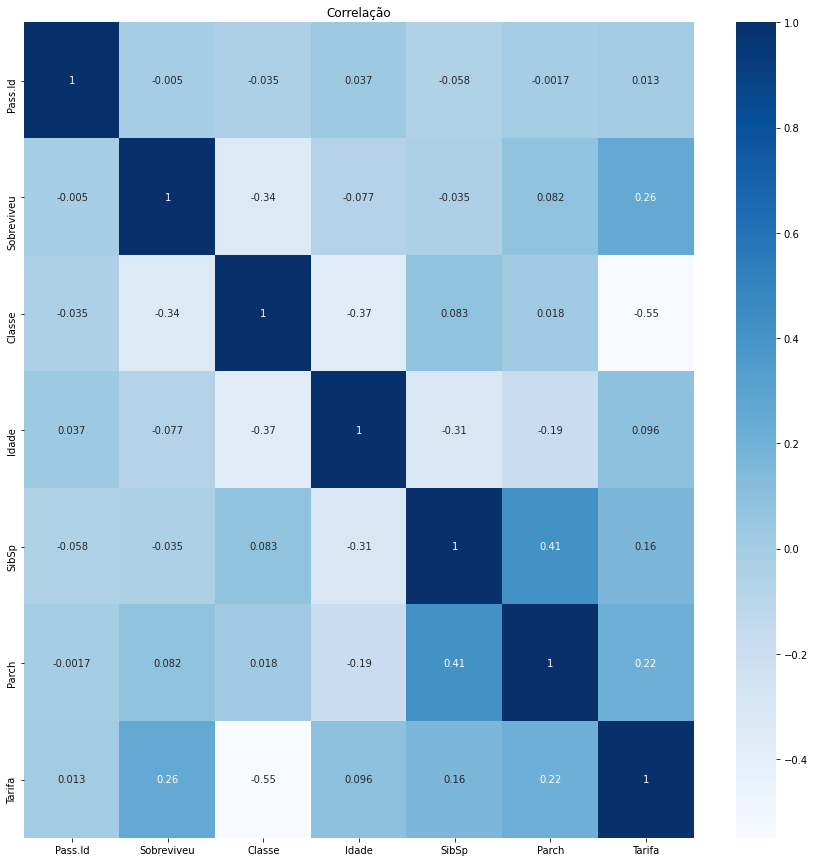

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,cmap='Blues')
plt.title('Correlação')

Aqui já conseguimos perceber que alguns fatores não estão aparecendo no nossa mapa de correlação e como 'Nome' ,'Bilhte' e 'Cabine'. 

Agora usando a biblioteca **seaborn** vamos analisar as colunas 'sexo', 'Classe' e 'Embarque' e como se comportaram entre os sobreviventes.

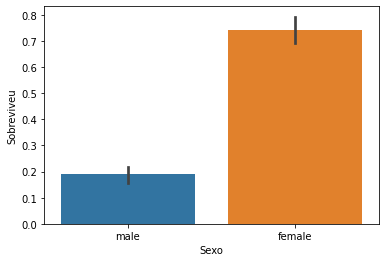

In [ ]:
sns.barplot(x =df1['Sexo'] ,y =df1['Sobreviveu'])

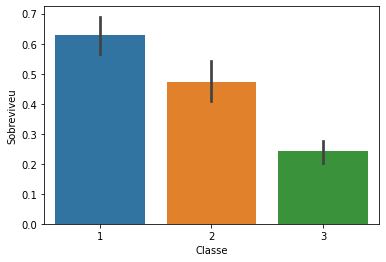

In [ ]:
sns.barplot(x=df1['Classe'] ,y=df1['Sobreviveu'] )

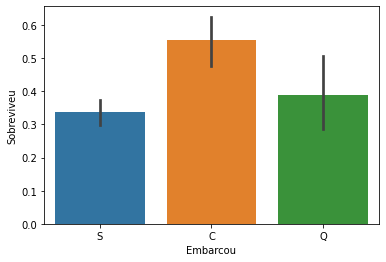

In [ ]:
sns.barplot(x=df1['Embarcou'] ,y=df1['Sobreviveu'] )

E aqui já conseguimos entender algumas observações interresantes, como o sexo feminino,as classes mais altas e os passageiros que embarcaram no porto 'C' estiveram em maiores números entre os sobreviventes. 

## Tratamento dos dados 
Antes de treinar nosso modelo de previsão temos que verificar se não existe valores ausentes e variaveis categoricas na nossa base de dados, pois o algoritmo de Machine learning que vamos usar não reconhece valores faltantes e dados categoricos. 

Vamos começar retirando as colunas 'Nome','Bilhete','Cabine' que não apareceram na correlação, pois elas não vão afetar nosso modelo preditivo, e para isso vamos usar o comando drop ```.drop``` para retiralas. 



In [ ]:
df1 = df1.drop(['Nome','Bilhete','Cabine'],axis=1)
df1

,Pass.Id,Sobreviveu,Classe,Sexo,Idade,SibSp,Parch,Tarifa,Embarcou
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


Lembrando que as alterações que fazemos no dataset de treino vamos fazer no de teste.

In [ ]:
df2 = df2.drop(['Nome','Bilhete','Cabine'],axis=1 )
df2

,Pass.Id,Classe,Sexo,Idade,SibSp,Parch,Tarifa,Embarcou
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


### Valores faltantes
Primeito vamos verificar quais colunas no nosso dataset tem valores ausentes, e para isso vamos colocar o comando `.isnull()` para identificar os dados ausentes nas colunas  e o comando `.sum()` para soma-los.


In [ ]:
df1.isnull().sum()

Pass.Id         0
Sobreviveu      0
Classe          0
Sexo            0
Idade         177
SibSp           0
Parch           0
Tarifa          0
Embarcou        2
dtype: int64

Aqui identificamos que temos duas colunas com dados ausentes 'Idade' e 'Embarcou', nesses casos podemos tirar as linhas ou substituir, mas para não perdemos as linhas vamos substituir os valores.

A coluna 'Idade' é númerica então vamos substituir os valores ausentes com a mediana dessa coluna e a coluna 'Embarcou' é categorica e aqui vamos usar a moda para substituir.

Primeiro vamos tratar os dados Númericos e para isso usamos o comano `.describe()` para entender como estão se comportanto os valores dessa coluna.

In [ ]:
df1['Idade'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Idade, dtype: float64

Aqui calculamos a mediana e salvamos em uma variavel.

In [ ]:
mediana =df1['Idade'].median()
mediana

28.0

Com o comando `.fillna(mediana,inplace=True)` substituimos os valores ausentes pela mediana e o `inplace=True ` ajuda para que não precise redefinir a varialvel.

In [ ]:
df1['Idade'].fillna(mediana,inplace=True)

Agora verificamos se os dados foram substituidos.

In [ ]:
df1['Idade'].isnull().sum() 

0

Lembrando que oque fazemos com dataset de treino devemos fazer com o de teste.

In [ ]:
mediana2 =df2['Idade'].median()
df2['Idade'].fillna(mediana2,inplace=True)

In [ ]:
df2['Idade'].isnull().sum() 

0

Agora os categoricos 

In [ ]:
agrupado = df1.groupby(['Embarcou']).size()
agrupado

Embarcou
C    168
Q     77
S    644
dtype: int64

In [ ]:
df1['Embarcou'].fillna('S',inplace=True)

In [ ]:
df1['Embarcou'].isnull().sum()

0

In [ ]:
agrupado2= df2.groupby(['Embarcou']).size()
df1['Embarcou'].fillna('S',inplace=True)

In [ ]:
df1.isnull().sum()

Pass.Id       0
Sobreviveu    0
Classe        0
Sexo          0
Idade         0
SibSp         0
Parch         0
Tarifa        0
Embarcou      0
dtype: int64

In [ ]:
mediana2 =df2['Tarifa'].median()
df2['Tarifa'].fillna(mediana2,inplace=True)
df2.isnull().sum()

Pass.Id     0
Classe      0
Sexo        0
Idade       0
SibSp       0
Parch       0
Tarifa      0
Embarcou    0
dtype: int64

Agora vamos transformar as variaveis categoricas em numericas 


In [ ]:
df1.head()

,Pass.Id,Sobreviveu,Classe,Sexo,Idade,SibSp,Parch,Tarifa,Embarcou
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
labelencoder = LabelEncoder()
df1['Sexo']= labelencoder.fit_transform(df1['Sexo'])

In [ ]:
df1['Sexo']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sexo, Length: 891, dtype: int64

In [ ]:
df1['Embarcou']= labelencoder.fit_transform(df1['Embarcou'])

In [ ]:
df1['Embarcou']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarcou, Length: 891, dtype: int64

In [ ]:
df2['Sexo']= labelencoder.fit_transform(df2['Sexo'])
df2['Embarcou']= labelencoder.fit_transform(df2['Embarcou'])

In [ ]:
df1.head()

,Pass.Id,Sobreviveu,Classe,Sexo,Idade,SibSp,Parch,Tarifa,Embarcou
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [ ]:
df2.head()

,Pass.Id,Classe,Sexo,Idade,SibSp,Parch,Tarifa,Embarcou
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


## Aplicadando o algoritmo de **ML**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
prev = df1.drop(['Sobreviveu'],axis=1)
classe = df1['Sobreviveu']
prev

,Pass.Id,Classe,Sexo,Idade,SibSp,Parch,Tarifa,Embarcou
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,28.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


In [ ]:
x_treino, x_test , y_treino, y_test = train_test_split(prev,
                                                       classe,
                                                       test_size = 0.3,
                                                       random_state = 0) 

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(x_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
export_graphviz(arvore, out_file = "tree.dot")

In [ ]:
previsoes = arvore.predict(x_test)
confus = confusion_matrix(y_test,previsoes)
taxa_acerto = accuracy_score(y_test,previsoes)
taxa_acerto

0.75

Vamos salvar o modelo 

In [ ]:
ids = df2['Pass.Id']
predictions = arvore.predict(df2)

In [ ]:
submission = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions.astype('int64') })
submission.to_csv('submission.csv', index=False)

In [ ]:
gabriel = np.array([3,3,0,22,1,1,7.0,2]).reshape(1,-1)
gabriel

array([[ 3.,  3.,  0., 22.,  1.,  1.,  7.,  2.]])

In [ ]:
previsoes = arvore.predict(gabriel)

In [ ]:
previsoes

array([0])